<a href="https://colab.research.google.com/github/RodrigoGuedesDP/Statistics/blob/main/Colab_05_LGN_y_TLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ley de los grandes números

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, binom, geom, expon

# Estimación de $\pi$

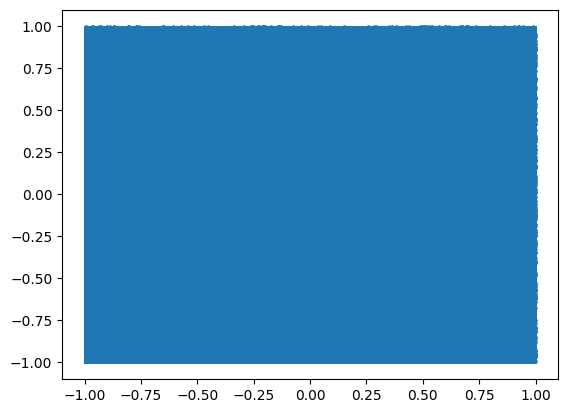

In [ ]:
N=10**6
x=uniform.rvs(-1, 2, size=N)
y=uniform.rvs(-1, 2, size=N)

plt.scatter(x, y, s=1)
plt.show()

En promedio, cuántos puntos caen dentro del circulo unitario.

In [ ]:
count=0
for i in range(len(x)):
  if x[i]**2+y[i]**2<=1:
    count+=1

prob=count/len(x)
prob

0.78488

El área del círculo es $\pi$ por lo tanto la probabilidad es $\frac{\pi}{4}$. El estimado de $\pi$ es $4$ veces la probabilidad estimada.

In [ ]:
4*prob

3.13952

## **Variable normal**

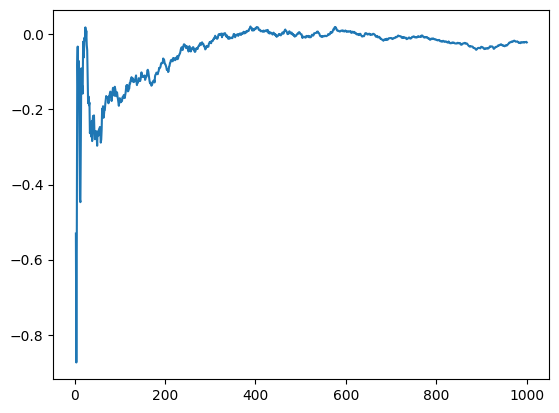

In [ ]:
n=1000
sample=norm.rvs(size=n)

medias=[]
for i in range(n):
  medias.append(np.mean(sample[1:i]))

plt.plot(np.arange(1, n+1), medias)
plt.show()

## Integral de MonteCarlo

$\displaystyle\int_0^1 sen x \ dx\approx 0.45970$

In [ ]:
n=10**4
np.mean(np.sin(uniform.rvs(size=n)))

0.4610747318311083

In [ ]:
import math
n=10000
np.mean(np.cos(2*math.pi*uniform.rvs(size=n)))

0.01025092854149492

In [ ]:
import math
n=10000
np.mean(np.cos(2*math.pi*uniform.rvs(size=n)**2))

0.2421337273228998

## Distribución de la media

## **Variable uniforme**



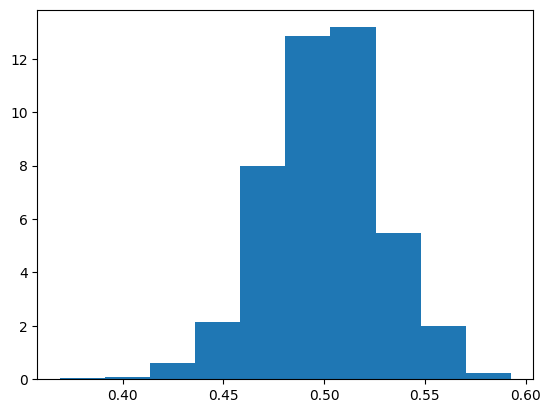

0.5001748640762785

In [ ]:
n=100 # tamaño de la muestra
resultados_media=[]
for i in range(1000):
  media=np.mean(uniform.rvs(size=n))
  resultados_media.append(media)

plt.hist(resultados_media, density=True)
plt.show()

np.mean(resultados_media)

In [ ]:
np.std(resultados_media)

0.02886662934900666

In [ ]:
(1/12)**(0.5)/(100)**(0.5)

0.028867513459481287

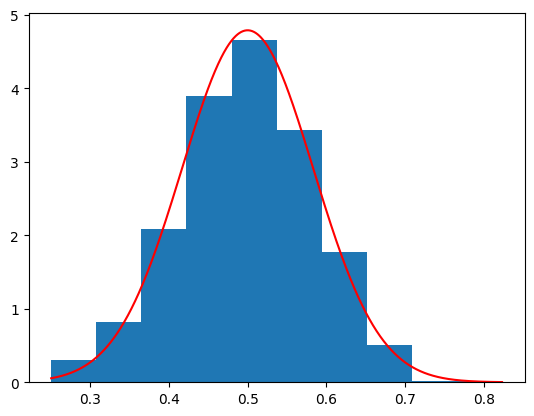

In [ ]:
n=12 # tamaño de la muestra
resultados_media=[]
for i in range(1000):
  media=np.mean(uniform.rvs(size=n))
  resultados_media.append(media)

plt.hist(resultados_media, density=True)


np.mean(resultados_media)

mu = 0.5
sigma = (1/np.sqrt(12)) / np.sqrt(n)
x = np.linspace(min(resultados_media), max(resultados_media), 1000)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, 'r-')
plt.show()

In [ ]:
mu = 0.5
sigma = (1/np.sqrt(12)) / np.sqrt(n)
norm.cdf(0.6, mu, sigma)-norm.cdf(0.4, mu, sigma)

0.7698606595565831

In [ ]:
cont=0
for x in resultados_media:
  if x<=0.6 and x>=0.4:
    cont+=1
cont/len(resultados_media)

0.765

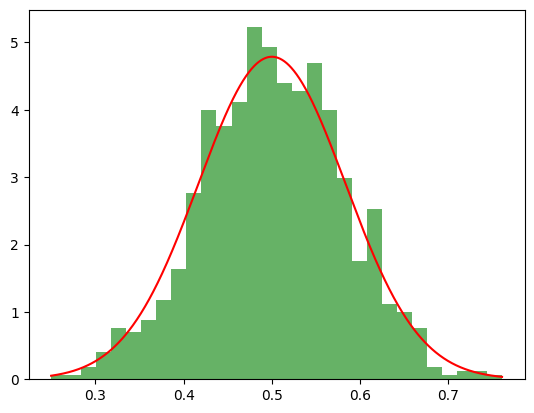

In [ ]:
n_sim = 1000
n_var = 12
medias = np.mean(np.random.uniform(0, 1, (n_sim, n_var)), axis=1)
mu = 0.5
sigma = (1/np.sqrt(12)) / np.sqrt(n_var)
x = np.linspace(min(medias), max(medias), 1000)
y = norm.pdf(x, mu, sigma)
plt.hist(medias, bins=30, density=True, alpha=0.6, color='green')
plt.plot(x, y, 'r-')
plt.show()

## **Variable normal**

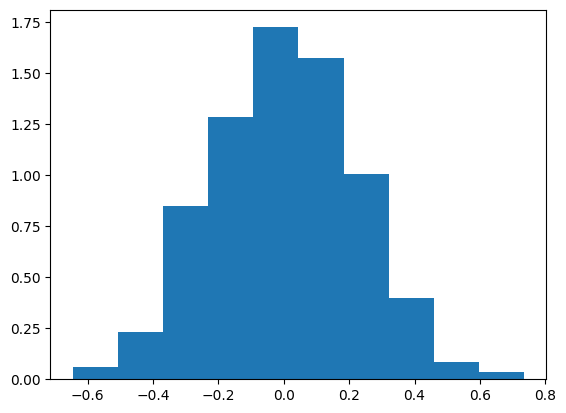

0.004830483175441632

In [ ]:
n=20 # tamaño de la muestra
resultados_media=[]
for i in range(1000):
  media=np.mean(norm.rvs(size=n))
  resultados_media.append(media)

plt.hist(resultados_media, density=True)
plt.show()

np.mean(resultados_media)

## Variable exponencial

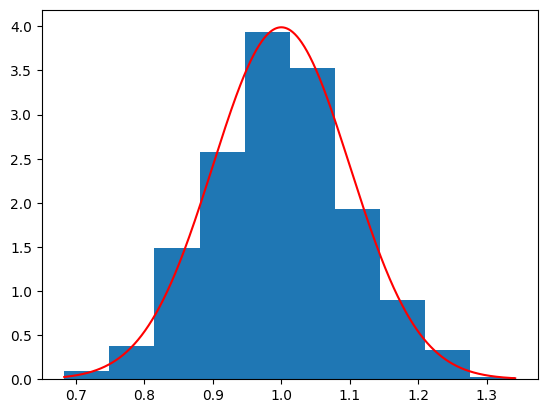

In [ ]:
n=100 # tamaño de la muestra
lam=1
resultados_media=[]
for i in range(1000):
  media=np.mean(expon.rvs(size=n, scale=1/lam))
  resultados_media.append(media)

plt.hist(resultados_media, density=True)

np.mean(resultados_media)

mu = 1/lam
sigma = np.sqrt((1/lam**2)/n)
x = np.linspace(min(resultados_media), max(resultados_media), 1000)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, 'r-')
plt.show()




# **Teorema del Límite Central**

In [ ]:
1-norm.cdf(0.03,0, 1/1200**0.5)

0.14934877799748514

In [ ]:
norm.ppf(0.975)

1.959963984540054

In [ ]:
(5*norm.ppf(0.975))**2

96.03647051735311


## **Ejercicio:**
Sean $X_1, X_2, \dots, X_n$ independientes e identicamente distribuidas con valor esperado $\mu$ y desviación estándar $\sigma$. Halle el valor esperado y la varianza de
$$T=\sum_{i=1}^n X_i.$$

Realice 1000 simulaciones de la variable $T$ con $n=365$, $\mu=0$ y $\sigma=9.8$


# Distribución de la varianza de una variable normal


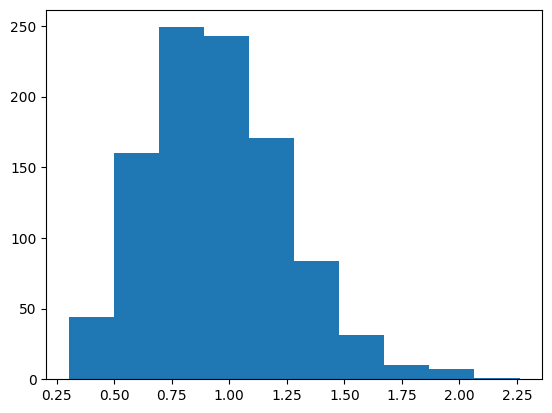

0.9496277211568525

In [ ]:
n=20
resultados_varianza=[]
for i in range(1000):
  varianza=np.var(norm.rvs(size=n))
  resultados_varianza.append(varianza)


plt.hist(resultados_varianza)
plt.show()
np.mean(resultados_varianza)

Sigue una distribución Chi-cuadrado

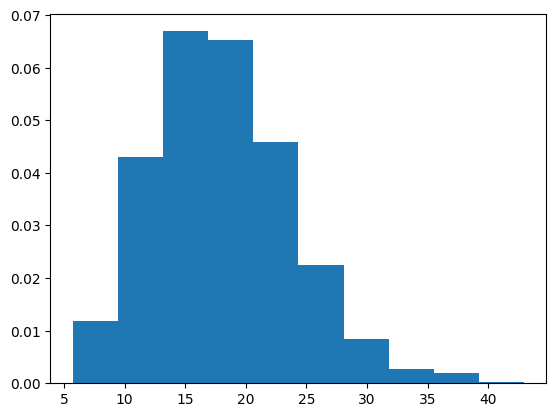

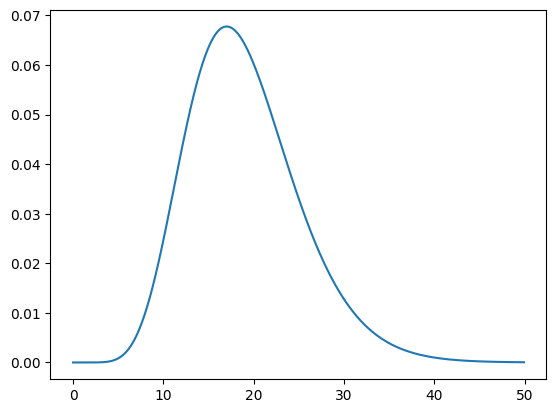

In [ ]:
from scipy.stats import chi2

plt.hist(np.multiply((n-1),resultados_varianza), density=True)
plt.show()

x=np.arange(0, 50, 0.1)
y=chi2.pdf(x, df=n-1)
plt.plot(x, y)
plt.show()